In [107]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [108]:
imgOrg = plt.imread(r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\birdImgx.jpg')
img2 = plt.imread(r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\cornerImgx.jpg')

In [109]:
imgGray = cv2.cvtColor(imgOrg, cv2.COLOR_RGB2GRAY)
img2Gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

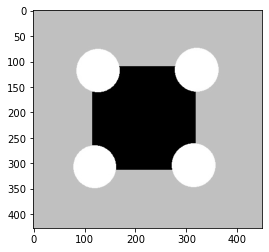

In [110]:
plt.imshow(img2Gray, cmap='gray')

---
### 265 - Corner Detection Implementation - SSD Concept
---

In [111]:
numRows, numCols = img2Gray.shape[0],img2Gray.shape[1]

In [112]:
directions = {'left':(0,-1),
             'right':(0,1),
             'up':(-1,0),
             'down':(1,0),
             'lu':(-1,-1),
             'ld':(1,-1),
             'ru':(-1,1),
             'rd':(1,1)}

In [113]:
C = np.zeros(img2Gray.shape)
for i in range(2,numRows-2):
    for j in range(2,numCols-2):
        minSSD = -1
        for d in directions.values():
            u , v = d[0],d[1]
            P1 = img2Gray[i-1:i+2,j-1:j+2]
            P2 = img2Gray[i+u-1:i+u+2,j+v-1:j+v+2]
            SSD = np.sum((P1-P2)**2)
            if minSSD==-1:
                minSSD = SSD
            elif SSD<minSSD:
                minSSD = SSD
        C[i,j] = minSSD

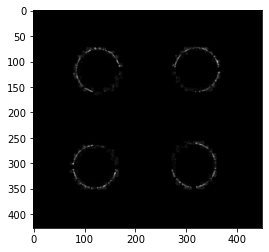

In [114]:
plt.imshow(C, cmap='gray')

In [115]:
th = C.mean()+3*C.std()
th

52.253953091658204

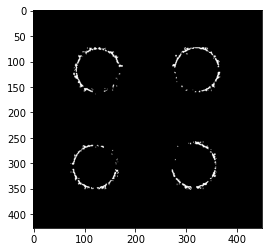

In [116]:
cImg = C>th
plt.imshow(cImg, cmap='gray')

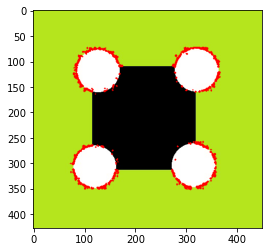

In [117]:
I2 = img2[:,:,::-1]
idx = np.argwhere(cImg)
r,c = idx[:,0],idx[:,1]
for i in range(len(r)):
    I2 = cv2.circle(np.float32(I2),(c[i],r[i]),radius=1,color=(0,0,255),thickness=-1)
plt.imshow(np.array(I2[:,:,::-1],np.uint8))

---
### 277 - Harris Corner Detector
---

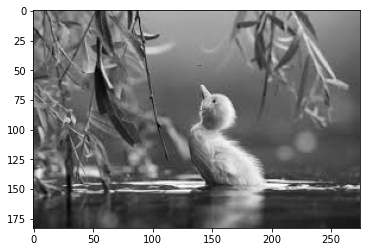

In [118]:
plt.imshow(imgGray, cmap='gray');

In [119]:
I = np.float64(imgGray)
maskX = np.array([[-1],[1]])
Ix = cv2.filter2D(I,-1,maskX)
Iy = cv2.filter2D(I,-1,maskX.T)
Ix2 = Ix*Ix
Iy2 = Iy*Iy
IxIy = Ix*Iy

In [120]:
K  = np.ones((3,3))
sIx2 = cv2.filter2D(Ix2,-1,K)
sIy2 = cv2.filter2D(Iy2,-1,K)
sIxIy = cv2.filter2D(IxIy,-1,K)

In [121]:
L1 = ((sIx2+sIy2)+((sIx2+sIy2)**2-4*(IxIy**2))**(0.5))/2
L2 = ((sIx2+sIy2)-((sIx2+sIy2)**2-4*(IxIy**2))**(0.5))/2

In [122]:
th = L2.mean()+3*L2.std()
th

128.07978364589587

In [123]:
th2 = L1.mean()+3*L1.std()
th2

40695.49728473531

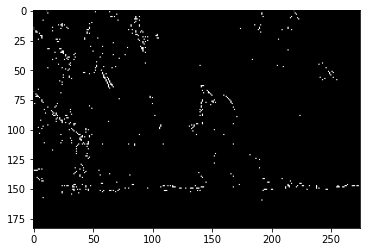

In [124]:
cImg = L2>th
# c2Img = L1>th
plt.imshow(cImg, cmap='gray')

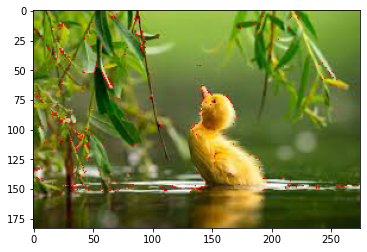

In [125]:
I2 = imgOrg[:,:,::-1]
idx = np.argwhere(cImg)
# idx2 = np.argwhere(c2Img)
r,c = idx[:,0],idx[:,1]
# r2,c2 = idx2[:,0],idx2[:,1]
for i in range(len(r)):
    I2 = cv2.circle(np.float32(I2),(c[i],r[i]),radius=0,color=(0,0,255),thickness=-1)
plt.imshow(np.array(I2[:,:,::-1],np.uint8));